In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import least_squares

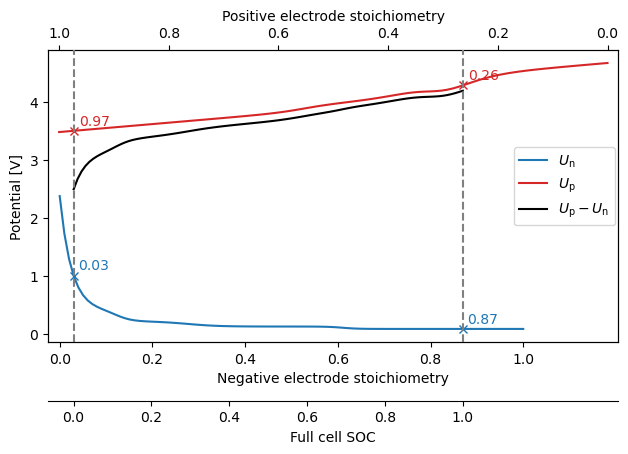

In [2]:
from parameters import *

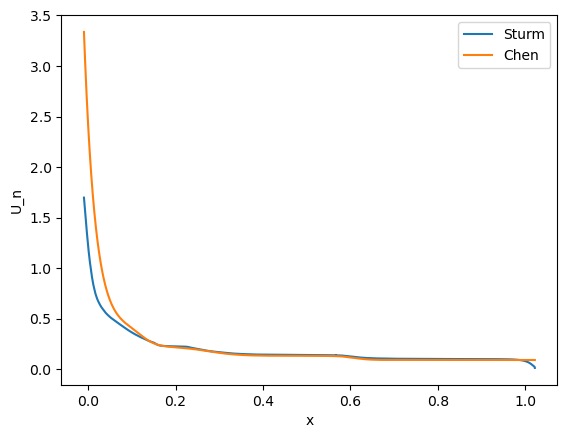

In [3]:
Un = pd.read_csv('paper_data/Fig1/Fig1a_Data4.txt',header=None,delim_whitespace=True,names=["x","U"])

fig, ax = plt.subplots()
ax.plot(Un.x,Un.U, label="Sturm")
ax.plot(Un.x, parameter_values["Negative electrode OCP [V]"](pybamm.Vector(Un.x)).evaluate(),label="Chen")
ax.set_xlabel("x")
ax.set_ylabel("U_n")
ax.legend()
fig.savefig("figures/Un.png")


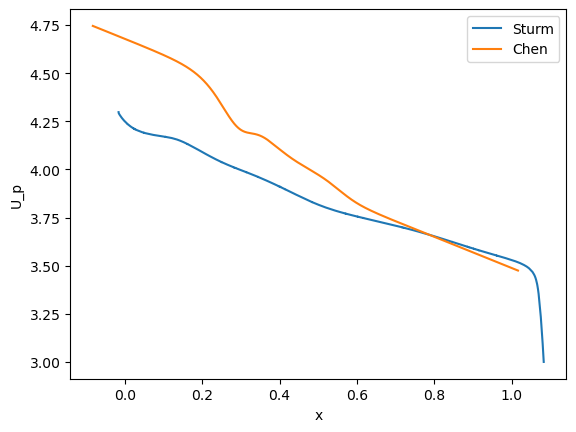

In [4]:
Up = pd.read_csv('paper_data/Fig1/Fig1a_Data1.txt',header=None,delim_whitespace=True,names=["x","U"])

fig, ax = plt.subplots()
ax.plot(1-Up.x,Up.U, label="Sturm")
ax.plot(Up.x, parameter_values["Positive electrode OCP [V]"](pybamm.Vector(Up.x)).evaluate(),label="Chen")
ax.set_xlabel("x")
ax.set_ylabel("U_p")
ax.legend()
fig.savefig("figures/Up.png")


In [10]:
data

array([2.999786, 2.999786, 2.999976, ..., 4.296665, 4.297047, 4.297429])

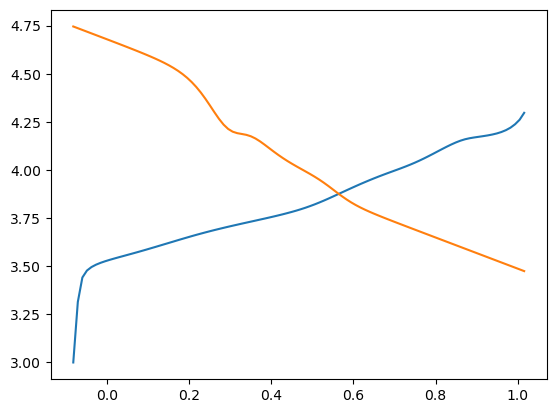

In [28]:
fig, ax = plt.subplots()

xlin = np.linspace(Up.x.iloc[0],Up.x.iloc[-1],100)
data = interp1d(Up.x,Up.U.values)(xlin)

# def objective(x):
#     xmin, xmax = x
#     vec = pybamm.Vector(xmin + (xmax-xmin)*Up.x)
#     chen = parameter_values["Positive electrode OCP [V]"](vec).evaluate().flatten()
#     return (chen - data)

plt.plot(xlin,data)
plt.plot(xlin,parameter_values["Positive electrode OCP [V]"](pybamm.Vector(xlin)).evaluate().flatten())
# plt.plot(Up.x,objective([0,1]))

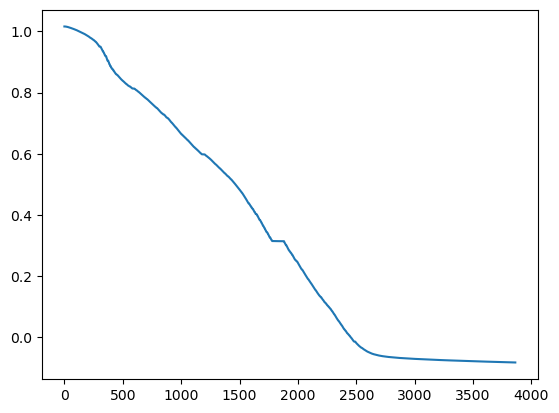

In [19]:
plt.plot(Up.x)